In [ ]:
# Attempt to use DeepLift for feature attribution on MNIST subset with digits 0,1,2,3

In [ ]:
from torchvision.models import resnet18
from torchvision.datasets import MNIST
from torchvision import transforms
from torch import nn
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

In [ ]:
# load model
from google.colab import drive
drive.mount('/content/drive')
model = torch.load('drive/MyDrive/mnist-0123-only-noinplace')
model.eval()
model.zero_grad()

Mounted at /content/drive


In [ ]:
!pip install -q captum

     |████████████████████████████████| 1.4 MB 2.9 MB/s 


In [ ]:
from captum.attr import *

In [ ]:
deepl = DeepLift(model, model.layer4[1].conv2)

In [ ]:
# Load Dataset
train_ds = MNIST("mnist", train=True, download=True, transform=transforms.ToTensor())
test_ds = MNIST("mnist", train=False, download=True, transform=transforms.ToTensor())
#train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
#test_dl = DataLoader(test_ds, batch_size=64)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
# isolate desired digits and create datasets (only need to use one for feature attribution testing)
isolated_indexes = (test_ds.targets == 0) | (test_ds.targets == 1) | (test_ds.targets == 2) | (test_ds.targets == 3)
test_ds.targets = test_ds.targets[isolated_indexes]
test_ds.data = test_ds.data[isolated_indexes]

In [ ]:
# Load all the data in one go
test_dl = DataLoader(test_ds, batch_size=500, shuffle=True, )

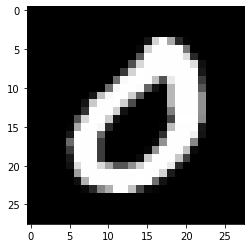

In [ ]:
# Sanity check, make sure the data is there
images, labels = iter(test_dl).next()
import matplotlib.pyplot as plt
image = images[45]
plt.imshow(image.squeeze(), cmap='gray')

In [ ]:
# attributions = deep_l.attribute(images, target=labels)
attributions = deepl.attribute(images,target=labels)

/usr/local/lib/python3.7/dist-packages/captum/_utils/gradient.py:59: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  "required_grads has been set automatically." % index
/usr/local/lib/python3.7/dist-packages/captum/attr/_core/deep_lift.py:339: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  after the attribution is finished"""


RuntimeError: ignored

In [ ]:
# From docs: Model cannot contain any in-place nonlinear submodules; these are not supported by the register_full_backward_hook PyTorch API starting from PyTorch v1.9.